In [1]:
import tensorflow
from tensorflow.keras.datasets import imdb # new! 
from tensorflow.keras.preprocessing.sequence import pad_sequences #new!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding # new!
from tensorflow.keras.callbacks import ModelCheckpoint # new! 
import os # new! 
from sklearn.metrics import roc_auc_score, roc_curve # new!
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Masking
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM,Dropout,Flatten ,Dense, GRU,Bidirectional
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import model_from_json
import numpy as np
import json
tf.__version__
from platform import python_version
np.version.version
python_version()

'3.7.7'

# Load Data

In [2]:
imdb = tfds.load("imdb_reviews", as_supervised=True)

In [3]:
train_set = imdb["train"]
test_set = imdb["test"]

# Train, Test  Split 

In [4]:
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []


In [5]:
for sentence, label in train_set:
    train_sentences.append(str(sentence.numpy()))
    train_labels.append(label.numpy())

In [6]:
for sentence, label in test_set:
    test_sentences.append(str(sentence.numpy()))
    test_labels.append(label.numpy())

In [7]:
train_label = np.array(train_labels)
test_label = np.array(test_labels)

# Hyperparameters

In [8]:
#boutput_dir = "model_output/dense"
vocab_size = 5000
embedding_dim = 64
max_length = 120
num_epoch =5
epochs = 20
batch_size = 128
trunc_type = "post"
oov_tok = "<OOV>"
n_dense = 64
dropout_dense = 0.2

# Preprocessing

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [10]:
tokenizer.fit_on_texts(train_sentences)

In [11]:
train_to_sequences_sentence = tokenizer.texts_to_sequences(train_sentences)

In [12]:
test_to_sequences_sentence = tokenizer.texts_to_sequences(test_sentences)

In [13]:
print(train_to_sequences_sentence[0])

[59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 1, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 1, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 1, 72, 229, 70, 2962, 16, 1, 2880, 1, 1, 1506, 4998, 3, 40, 3947, 119, 1608, 17, 3401, 14, 163, 19, 4, 1253, 927, 1, 9, 4, 18, 13, 14, 4200, 5, 102, 148, 1237, 11, 240, 692, 13, 44, 25, 101, 39, 12, 1, 1, 39, 1378, 1, 52, 409, 11, 99, 1214, 874, 145, 10]


# Padding

In [14]:
train_padded = pad_sequences(train_to_sequences_sentence, maxlen= max_length, truncating=trunc_type)

In [15]:
test_padded = pad_sequences(test_to_sequences_sentence,maxlen= max_length, truncating=trunc_type)

# Developing the Model

In [16]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim= embedding_dim , input_length=max_length),
    Flatten(),
    Dense(n_dense, activation='relu'),
    Dropout(dropout_dense),
    Dense(1, activation='sigmoid')
])


In [17]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 64)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 7680)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                491584    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 811,649
Trainable params: 811,649
Non-trainable params: 0
_________________________________________________________________


In [19]:
# modelcheckpoint = ModelCheckpoint(filepath=output_dir+
#                                   "/weights.{epoch:02d}.hdf5")

In [20]:
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

In [21]:
model_history= model.fit(train_padded, train_label, 
          batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(test_padded, test_label)) # callbacks=[modelcheckpoint]

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 137us/sample - loss: 0.5037 - accuracy: 0.7404 - val_loss: 0.3898 - val_accuracy: 0.8223
Epoch 2/20
25000/25000 [==============================] - 3s 120us/sample - loss: 0.2421 - accuracy: 0.9080 - val_loss: 0.4694 - val_accuracy: 0.7960
Epoch 3/20
25000/25000 [==============================] - 3s 122us/sample - loss: 0.0679 - accuracy: 0.9844 - val_loss: 0.5491 - val_accuracy: 0.8050
Epoch 4/20
25000/25000 [==============================] - 3s 116us/sample - loss: 0.0114 - accuracy: 0.9989 - val_loss: 0.6347 - val_accuracy: 0.8062
Epoch 5/20
25000/25000 [==============================] - 3s 117us/sample - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6897 - val_accuracy: 0.8088
Epoch 6/20
25000/25000 [==============================] - 3s 121us/sample - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7268 - val_accuracy: 0.8086
Epoch 7/20
25000/25000 [==========================

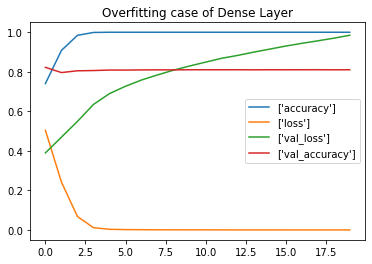

In [35]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.plot(model_history.history["val_accuracy"])
plt.legend([["accuracy"], ["loss"], ["val_loss"], ["val_accuracy"]])
plt.title("Overfitting case of Dense Layer")
plt.show()

##### Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'numpy.int64'>"})

In [ ]:
#model.load_weights(output_dir+"/weights.01.hdf5")

In [36]:
y_hat = model.predict_proba(test_padded)

In [37]:
y_hat

array([[8.8805515e-01],
       [8.9498723e-01],
       [3.8582359e-05],
       ...,
       [6.0155133e-07],
       [9.9819463e-01],
       [9.9999583e-01]], dtype=float32)

In [38]:
y_hat[0]

array([0.88805515], dtype=float32)

In [39]:
test_label[0:10]

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [42]:
for i in range(len(y_hat[0:10])):
    print(list(map('{:.2f}%'.format,y_hat[i])))

['0.89%']
['0.89%']
['0.00%']
['0.00%']
['1.00%']
['1.00%']
['1.00%']
['1.00%']
['0.45%']
['0.00%']


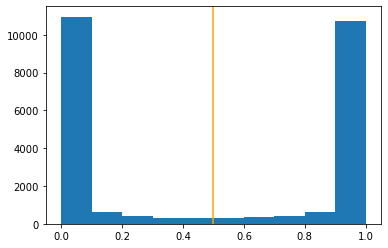

In [43]:
plt.hist(y_hat)
_ = plt.axvline(x = 0.5, color = "orange")

In [44]:
pct_auc = roc_auc_score(test_label,y_hat)*100

In [45]:
print(pct_auc)

89.2358448


# Sample Test

In [56]:
sentence_1 = ["This movie is the worst thing ever I watched",
           "I hate the actor in this movie. But the movie is great",
              "This movie is fucking awful",
              "This movie is the most terrible movie i have watched with horrible actor",
           "Do not watch this movie because this movie is really bad",
           "Fuck this movie. It is really bad",
           "This movie is the best"]

In [57]:
sentence_1_text_to_sequence = tokenizer.texts_to_sequences(sentence_1)

In [58]:
sentence_1_sequence_padded = pad_sequences(sentence_1_text_to_sequence,maxlen = max_length)

In [59]:
output_probabilities= model.predict_proba(sentence_1_sequence_padded)
output_probabilities

array([[8.5721374e-05],
       [3.9682522e-01],
       [2.4109920e-04],
       [1.4656284e-05],
       [5.3285493e-04],
       [1.5323880e-03],
       [7.7869391e-01]], dtype=float32)

In [60]:
for i in range(len(output_probabilities)):
    print("\n")
    print(sentence_1[i], "\n", list(map('{:.2f}%'.format,output_probabilities[i])))



This movie is the worst thing ever I watched 
 ['0.00%']


I hate the actor in this movie. But the movie is great 
 ['0.40%']


This movie is fucking awful 
 ['0.00%']


This movie is the most terrible movie i have watched with horrible actor 
 ['0.00%']


Do not watch this movie because this movie is really bad 
 ['0.00%']


Fuck this movie. It is really bad 
 ['0.00%']


This movie is the best 
 ['0.78%']
